# Computer Lab 7: Land snow cover
Climate Data Analysis, ATS 301, Fall 2018					

As before, we start by specifing that we want plots to be displayed inside the Jupyter Notebook, and load the modules we'll need.


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Set default figure size
# This is so I don't have to keep specifying figsize later.
plt.rcParams['figure.figsize'] = (10.0, 8.0)

import xarray as xr
import cartopy.crs as ccrs
from scipy import stats
import math

## Introduction to the dataset

In [4]:
snow_file='/data/ATS_301/Data/nhsce_v01r01_19661004_20181001.nc'
dsnow = xr.open_dataset(snow_file)

The reference for this dataset is:

Robinson, David A., Estilow, Thomas W., and NOAA CDR Program (2012):NOAA Climate Date Record (CDR) of Northern Hemisphere (NH) Snow Cover Extent (SCE), Version 1. NOAA National Climatic Data Center. doi:10.7289/V5N014G9 [accessed 10/19/2018].

Start, as usual, by looking at the basic information in the file:

In [3]:
dsnow

<xarray.Dataset>
Dimensions:               (cols: 88, rows: 88, time: 2713)
Coordinates:
  * time                  (time) datetime64[ns] 1966-10-10 1966-10-17 ...
    snow_cover_threshold  float32 ...
    latitude              (rows, cols) float64 ...
    longitude             (rows, cols) float64 ...
Dimensions without coordinates: cols, rows
Data variables:
    coord_system          |S1 ...
    land                  (rows, cols) float32 ...
    area                  (rows, cols) float32 ...
    snow_cover_extent     (time, rows, cols) float32 ...
Attributes:
    Conventions:               CF-1.6
    Metadata_Conventions:      CF-1.6, Unidata Dataset Discovery v1.0, NOAA C...
    standard_name_vocabulary:  CF Standard Name Table (v22, 12 February 2013)
    id:                        nhsce_v01r01_19661004_20181001.nc
    naming_authority:          gov.noaa.ncdc
    metadata_link:             http://www1.ncdc.noaa.gov/pub/data/metadata/pu...
    title:                     Climate Data R

Notice the dimensions of the latitude and longitude arrays:

In [4]:
dsnow.latitude

<xarray.DataArray 'latitude' (rows: 88, cols: 88)>
array([[0.6592, 1.3221, 1.9844, ..., 1.9844, 1.3221, 0.6592],
       [1.3221, 2.0003, 2.6783, ..., 2.6783, 2.0003, 1.3221],
       [1.9844, 2.6783, 3.3722, ..., 3.3722, 2.6783, 1.9844],
       ...,
       [1.9844, 2.6783, 3.3722, ..., 3.3722, 2.6783, 1.9844],
       [1.3221, 2.0003, 2.6783, ..., 2.6783, 2.0003, 1.3221],
       [0.6592, 1.3221, 1.9844, ..., 1.9844, 1.3221, 0.6592]])
Coordinates:
    snow_cover_threshold  float32 ...
    latitude              (rows, cols) float64 0.6592 1.322 1.984 2.646 ...
    longitude             (rows, cols) float64 ...
Dimensions without coordinates: rows, cols
Attributes:
    standard_name:  latitude
    long_name:      latitude of cell center in half mesh grid, based on NOAA ...
    units:          degrees_north
    valid_range:    [ 0. 90.]

In [5]:
dsnow.longitude

<xarray.DataArray 'longitude' (rows: 88, cols: 88)>
array([[ 145.    ,  144.3338,  143.6521, ...,   56.3479,   55.6662,   55.    ],
       [ 145.6662,  145.    ,  144.3179, ...,   55.6821,   55.    ,   54.3338],
       [ 146.3479,  145.6821,  145.    , ...,   55.    ,   54.3179,   53.6521],
       ...,
       [-126.3479, -125.6821, -125.    , ...,  -35.    ,  -34.3179,  -33.6521],
       [-125.6662, -125.    , -124.3179, ...,  -35.6821,  -35.    ,  -34.3338],
       [-125.    , -124.3338, -123.6521, ...,  -36.3479,  -35.6662,  -35.    ]])
Coordinates:
    snow_cover_threshold  float32 ...
    latitude              (rows, cols) float64 0.6592 1.322 1.984 2.646 ...
    longitude             (rows, cols) float64 145.0 144.3 143.7 143.0 142.2 ...
Dimensions without coordinates: rows, cols
Attributes:
    standard_name:  longitude
    long_name:      longitude of cell center in half mesh grid, based on NOAA...
    units:          degrees_east
    valid_range:    [-180.  180.]

This dataset uses a non-regular grid.  We'll get back to this in a bit.

Now, look at the three "Data Variables" (ignore coord_system). What data do they each contain?  

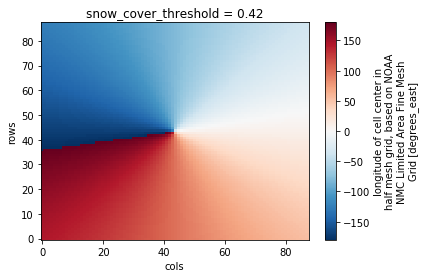

In [7]:
dsnow.longitude.plot()

In [8]:
dsnow.land

<xarray.DataArray 'land' (rows: 88, cols: 88)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
    snow_cover_threshold  float32 ...
    latitude              (rows, cols) float64 0.6592 1.322 1.984 2.646 ...
    longitude             (rows, cols) float64 145.0 144.3 143.7 143.0 142.2 ...
Dimensions without coordinates: rows, cols
Attributes:
    long_name:      land water mask
    standard_name:  land_binary_mask
    grid_mapping:   coord_system
    valid_range:    [0 1]
    flag_values:    [0 1]
    flag_meanings:  water land

In [9]:
dsnow.snow_cover_extent

<xarray.DataArray 'snow_cover_extent' (time: 2713, rows: 88, cols: 88)>
[21009472 values with dtype=float32]
Coordinates:
  * time                  (time) datetime64[ns] 1966-10-10 1966-10-17 ...
    snow_cover_threshold  float32 ...
    latitude              (rows, cols) float64 0.6592 1.322 1.984 2.646 ...
    longitude             (rows, cols) float64 145.0 144.3 143.7 143.0 142.2 ...
Dimensions without coordinates: rows, cols
Attributes:
    long_name:      NOAA/NCDC Climate Data Record of snow cover extent
    standard_name:  surface_snow_binary_mask
    grid_mapping:   coord_system
    valid_range:    [0 1]
    flag_values:    [0 1]
    flag_meanings:  no_snow snow_covered

In [10]:
# This is just an subset of the data so we can see example values. 
# The specific time, lats, and lons aren't important right now.

dsnow.snow_cover_extent[0,30:35,:].values

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.

Note all snow cover extent values are either 0 or 1.

In [11]:
dsnow.area

<xarray.DataArray 'area' (rows: 88, cols: 88)>
array([[10676.8, 10920.5, 11166.7, ..., 11166.7, 10920.5, 10676.8],
       [10920.5, 11172.7, 11427.5, ..., 11427.5, 11172.7, 10920.5],
       [11166.7, 11427.5, 11691.2, ..., 11691.2, 11427.5, 11166.7],
       ...,
       [11166.7, 11427.5, 11691.2, ..., 11691.2, 11427.5, 11166.7],
       [10920.5, 11172.7, 11427.5, ..., 11427.5, 11172.7, 10920.5],
       [10676.8, 10920.5, 11166.7, ..., 11166.7, 10920.5, 10676.8]],
      dtype=float32)
Coordinates:
    snow_cover_threshold  float32 ...
    latitude              (rows, cols) float64 0.6592 1.322 1.984 2.646 ...
    longitude             (rows, cols) float64 145.0 144.3 143.7 143.0 142.2 ...
Dimensions without coordinates: rows, cols
Attributes:
    long_name:      cell area in km^2
    standard_name:  cell_area
    grid_mapping:   coord_system
    units:          km^2
    valid_range:    [10676.8 41804.6]

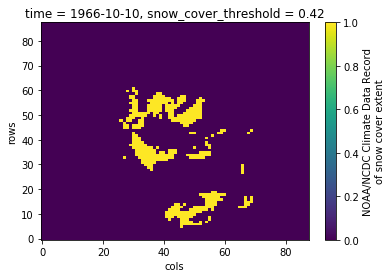

In [12]:
# quick look at data for one time
dsnow.snow_cover_extent[0,:,:].plot()

Because the values are all either 0 or 1, the plot for a single time only has two colors.  Average over all the times to get the snow climatology.

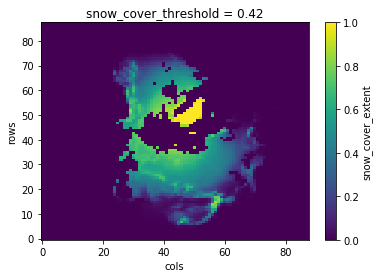

In [13]:
# time average at every point. This will produce values other than 0 and 1 to make something 
# nicer to plot.

time_average_snow=dsnow.snow_cover_extent.mean(dim='time')
time_average_snow.plot()

### Excluding ocean grid points

This plot doesn't show the difference between land with no snow and ocean.  Fortunately, the `land` variable (in the netcdf file) indicates where there is land (where it is =1). 0 corresponds to ocean. We can create a new variable, equal to `snow_cover_extent` when there is land (`dsnow.land>0`), and `nan` where there is ocean.

In [14]:
# False if land = 0, True is land = 1 (i.e., >0)
# Only a slice of the array shown

dsnow.land[31,:].values > 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [5]:
snow = dsnow.snow_cover_extent.where(dsnow.land > 0)
snow[0,31,:].values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan,  0.,  1.,  1.,  1.,  1.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., nan, nan,  0.,  0.,  0.,  0., nan, nan, nan, nan,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

Now we can use this new snow variable for our plot.  Fortunately, the `xr.plot` function omits `nan`'s by default.

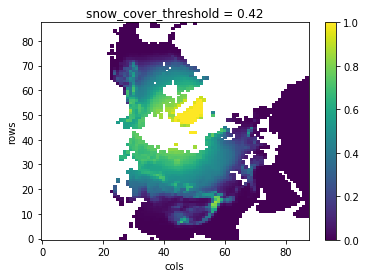

In [6]:
time_average_snow=snow.mean(dim='time')
time_average_snow.plot()

### Weird coordinates...

So this looks a little odd.  What's going on?

Looking at those latitudes and longitudes again...

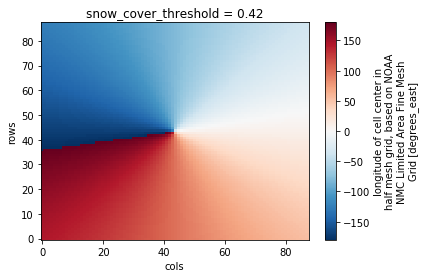

In [17]:
dsnow.longitude.plot()

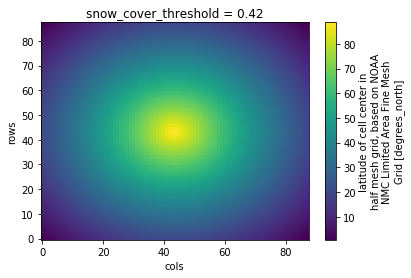

In [18]:
dsnow.latitude.plot()

Fortunately, python can deal with these weird 2-d lats and lons. We just pass them to the xarray `plot` function.

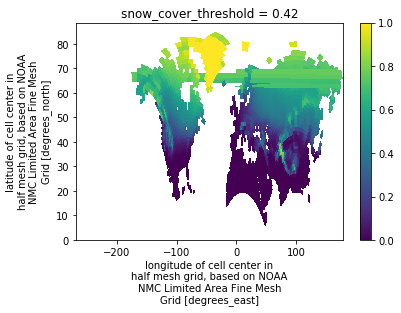

In [19]:
# We have to specify the x and y values, since the coord dimens are col and row,
# which don't correspond to lat and lon.
time_average_snow.plot(x='longitude',y='latitude')

To make this plot, use `cartopy` and switch to the orthographic projection. We want the N. Pole in the middle. 
Use `(0,90)` to indicate the center at 0 deg long, 90 deg lat.

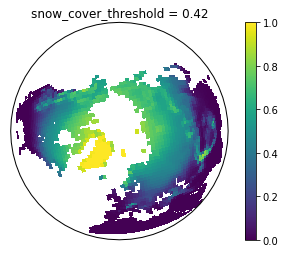

In [20]:
ax = plt.axes(projection=ccrs.Orthographic(0, 90))

# We have to specify the x and y values, since the coord dimens are col and row,
# which don't correspond to lat and lon.
time_average_snow.plot(x='longitude',y='latitude',ax=ax,transform=ccrs.PlateCarree())
plt.show()

Change the colormap to `Greys_r`, so that white=snow. 

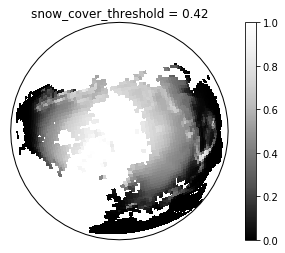

In [21]:
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
time_average_snow.plot(x='longitude',y='latitude',ax=ax,transform=ccrs.PlateCarree(),cmap='Greys_r')
plt.show()

We can add in a prettier ocean, using the `ax.stock_img()` command.  We'll do this first, and then put the snow on top of it.  We'll still see the ocean (where `time_average_snow` is `nan`).  This is one advantage of using the `land` variable to distinguish land from ocean points.

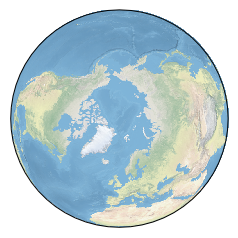

In [22]:
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.stock_img()

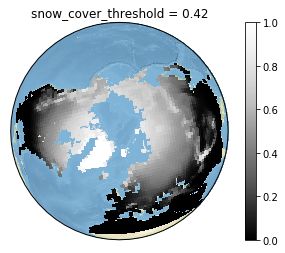

In [23]:
ax = plt.axes(projection=ccrs.Orthographic(0, 90))

# This needs to be before the plot function, so that it is at the bottom of the figure.
ax.stock_img()
time_average_snow.plot(x='longitude',y='latitude',ax=ax,transform=ccrs.PlateCarree(),cmap='Greys_r')
plt.show()

## Probability distributions

We'll start by plotting the histogram for all data points and times.

Note: sometimes it will take a long time calculating the histogram.  In these cases, specify `range=(0,1)` to help `plt.hist` out a bit. It gets confused by the fact that there are only 2 possible values.

(array([6120394.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 1937042.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

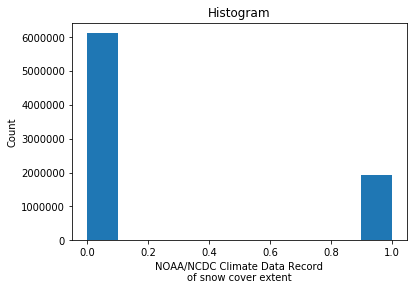

In [7]:
snow.plot.hist()

To convert this histogram to a <b>probability distribution</b> plot, use the `density=True` option.

(array([7.59595721, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 2.4040421 ]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

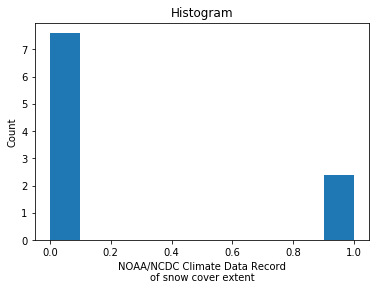

In [25]:
snow.plot.hist(density=True)

`density=True` will make integral of histogram sum to 1. The total count for all bins is 10. Since the bins are each 0.1 wide, this integrates to 1.

What sort of **distribution** is this?

Another way to create this plot is using the `plt.hist` function [note that this goes before the variable]. It doesn't deal with missing values very well, but it will let us include two histograms next to each other later. Since we have missing values, we have to explicitly indicate the range using `range=(0,1)`.  We'll still get a warning, but at least it will plot. 

The `np.ravel` function converts the 3-d array into a 1-D array. `plt.hist` will not work with arrays that have more than two dimensions.



/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([7.59595721, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 2.4040421 ]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

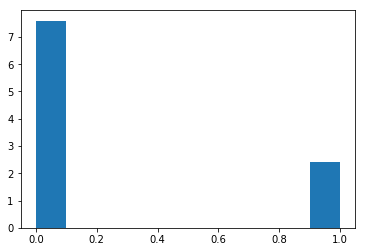

In [26]:
plt.hist(np.ravel(snow),range=(0,1),density=True)

### Generate random sample from distribution

This is a <b>Bernoulli</b> distribution. `scipy.stats` includes a Bernoulli distribution function we can use for comparison.

The `p` shape parameter determines the fraction of 1's versus 0's in the distribution. 

To generate a random sample of from this distribution, we use the `rvs` function. The `size` option indicates how many samples to generate.

(array([7.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 2.6]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

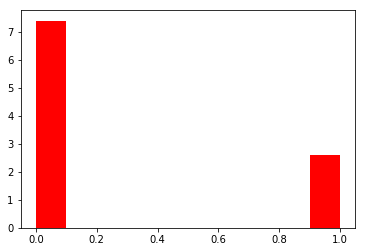

In [28]:
p = 0.3                                 # Shape parameter
r = stats.bernoulli.rvs(p, size=100)    # Sample from the Bernoulli distribution 100 times

plt.hist(r,density=True,color='r')

Plot both distributions for comparison. We have to use the `plt.hist` function with `np.ravel` for the snow variable, which means we'll get warning messages.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


([array([7.59595721, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 2.4040421 ]),
  array([7.19999989, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 2.79999933])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 2 Lists of Patches objects>)

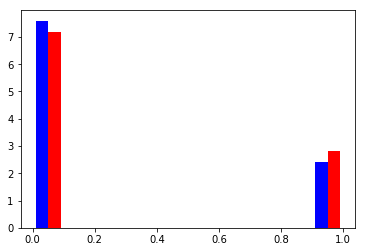

In [33]:
p = 0.3
r = stats.bernoulli.rvs(p, size=100)

plt.hist([np.ravel(snow),r],range=(0,1),density=True,color=('b', 'r'))

Repeat the above cell a few times. What happens to the red bars?

In [ ]:
# Digression: if you want to get rid of the warning, you have to do two steps:

# convert 3D array to 1D array
snow_1d=np.ravel(snow)

# Make new array with just the land values
land_snow_frac=snow_1d[np.where(np.isfinite(snow_1d))]

# Then, use land_snow_frac in plt.hist.

# Unfortunately, need to do this whenever want to use new array for histogram.

Now, increase the number of samples until the distribution doesn't change much when you re-sample from the Bernoulli distribution.

In [ ]:
p = 0.3
## Your sample number here
r = stats.bernoulli.rvs(p, size=???)

plt.hist([np.ravel(snow),r],range=(0,1),density=True,color=('b', 'r'))

Once you have a sample number that results in a fairly consistent distribution, play around with the `p` parameter until the Bernoulli distribution approx. matches the data. (You can actually calculate this explicitly from the snow data.)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


([array([7.59595721, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 2.4040421 ]),
  array([7.60249989, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 2.39749943])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 2 Lists of Patches objects>)

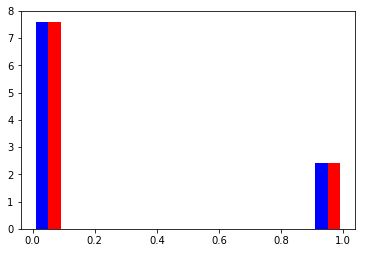

In [37]:
## Your parameter here
p = 0.24

## Sample number here
r = stats.bernoulli.rvs(p, size=20000)

plt.hist([np.ravel(snow),r],density=True,color=('b', 'r'),range=(0,1))

### Removing grid points that never have snow

Some grid points never have snow, so their snow fraction always = 0.  These just "pile up" on the left-hand side of the plot.  To better see how snow cover *changes* with time, we'll create a new array that just has grid points where there's snow at some point (during the entire record).

`np.any` is `True` if *any* value along a given `axis` (0=time, in this case) is `True` for the comparison.  We use `where`, similarly to what we did to omit the ocean points, to only keep these grid point values, setting the rest to `nan`.

In [8]:
new_snow = snow.where(np.any(snow > 0,axis=0))

(array([3623686.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 1937042.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

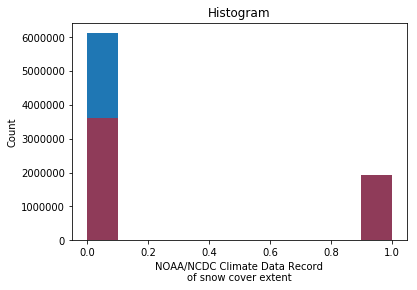

In [39]:
#plt.hist((np.ravel(snow),np.ravel(new_snow)),range=(0,1),density=False)

# Don't specify density=True here, since we want the count of values.
snow.plot.hist()
new_snow.plot.hist(color='red',alpha=0.5)

## Averaging snow cover fraction over different time periods (Central Limit Theorem)

Now, we're going to average snow cover over increasing periods of time to see the Central Limit Theorem in action:

The distribution of the mean of a big enough sample of independent random variables is a **normal (Gaussian) distribution**.

We're starting from **binary** data, and we don't have enough data to actually get to a Gaussian distribution, but we can start to see it occurring.

Part of the reason we eliminated the grid points that never have snow in the previous step is to make the fractions start converging closer to the middle.  

### Average one month at a time (monthly mean data)

Start by average data from the same month together. 

This will average 4 or 5 weeks together. What are possible values?

(Note that, since the behaviors of the different months (as well as the different grid cells) differ, these points don't really come from the same distribution. So we don't actually expect them to have a normal distribution.) 

Remind ourselves what new_snow looks like:

In [40]:
print(np.shape(new_snow))

(2713, 88, 88)


In [41]:
print(new_snow.time)

<xarray.DataArray 'time' (time: 2713)>
array(['1966-10-10T00:00:00.000000000', '1966-10-17T00:00:00.000000000',
       '1966-10-24T00:00:00.000000000', ..., '2018-09-17T00:00:00.000000000',
       '2018-09-24T00:00:00.000000000', '2018-10-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time                  (time) datetime64[ns] 1966-10-10 1966-10-17 ...
    snow_cover_threshold  float32 0.42
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T
    valid_range:    [    7 18991]


To convert from these weekly values, we `resample` into individual `M`onths. This behaves similarly to the `groupby` function.  Then, we average these different groups over the `'time'` dimension.  (*Note that this is not `.mean(dim='time')` as before.  Unfortunately, this is another place xarray is inconsistent.*)

Shape =  (625, 88, 88)

<xarray.DataArray 'time' (time: 625)>
array(['1966-10-31T00:00:00.000000000', '1966-11-30T00:00:00.000000000',
       '1966-12-31T00:00:00.000000000', ..., '2018-08-31T00:00:00.000000000',
       '2018-09-30T00:00:00.000000000', '2018-10-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time                  (time) datetime64[ns] 1966-10-31 1966-11-30 ...
    snow_cover_threshold  float32 0.42


(array([22.83695143,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.79124202,  0.        ,
         1.49429094,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55443505,  0.        ,  0.        ,  0.        ,
         1.08868921,  0.        ,  0.        ,  0.        ,  0.51326274,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.1344646 ,  0.        ,  0.51718102,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , 11.0694961 ]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
        0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
        0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
        0.9  , 0.925, 0.95 , 0.975, 1.   ], dtype=float32),
 <a list of 40 Patch objects>)

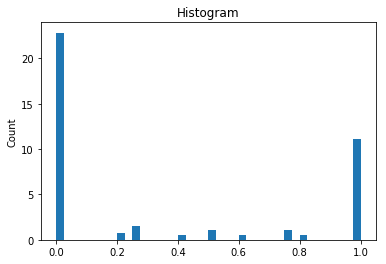

In [9]:
monthly_ave_snow=new_snow.resample(time='M').mean('time')
print('Shape = ',np.shape(monthly_ave_snow))
print('')
print(monthly_ave_snow.time)
monthly_ave_snow.plot(bins=40,density=True)

<xarray.DataArray (time: 613, rows: 88, cols: 88)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * time                  (time) datetime64[ns] 1967-08-31 1967-09-30 ...
    snow_cover_threshold  float32 0.42
    latitude              (rows, cols) float64 0.6592 1.322 1.984 2.646 ...
    longitude             (rows, cols) float64 145.0 144.3 143.7 143.0 142.2 ...
Dimensions without

(array([3.80177088e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.46679552e-01, 0.00000000e+00, 2.36766065e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        6.42925737e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.24350455e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.65736634e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.04331187e-01, 0.00000000e+00,
        4.85082272e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.22079038e+00]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
        0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
        0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0

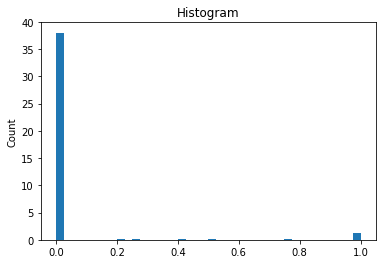

In [16]:
#

# When use resample function on particular months, it will add in nans for other months.

new_snow_Aug=new_snow[new_snow['time.month'] == 8]
monthly_ave_snow_Aug=new_snow_Aug.resample(time='M').mean('time')

print('Shape = ',np.shape(new_snow_Aug))
print('Shape = ',np.shape(monthly_ave_snow_Aug))

Averaging over more time steps gives us more possible values.

Shape =  (209, 88, 88)

<xarray.DataArray 'time' (time: 209)>
array(['1966-12-31T00:00:00.000000000', '1967-03-31T00:00:00.000000000',
       '1967-06-30T00:00:00.000000000', ..., '2018-06-30T00:00:00.000000000',
       '2018-09-30T00:00:00.000000000', '2018-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time                  (time) datetime64[ns] 1966-12-31 1967-03-31 ...
    snow_cover_threshold  float32 0.42


(array([1.78165023e+01, 0.00000000e+00, 1.46313010e-01, 2.04421793e+00,
        3.41489618e-02, 1.05223193e-01, 1.45452410e+00, 0.00000000e+00,
        9.60613359e-02, 1.18318251e+00, 3.85910917e-02, 7.44058459e-02,
        1.05204809e+00, 4.66424706e-02, 6.99637058e-02, 9.99203878e-01,
        3.40564071e-02, 8.84727282e-02, 9.55337745e-01, 0.00000000e+00,
        1.00596083e-01, 1.01077075e+00, 9.38403205e-02, 2.97067762e-02,
        1.06333854e+00, 7.70897307e-02, 4.91411158e-02, 1.02909701e+00,
        8.01435146e-02, 0.00000000e+00, 9.58022680e-01, 8.04211480e-02,
        1.85089390e-04, 9.89763151e-01, 5.67298979e-02, 2.73006850e-02,
        1.12478554e+00, 7.07041468e-02, 0.00000000e+00, 6.91947428e+00]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
        0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
        0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0

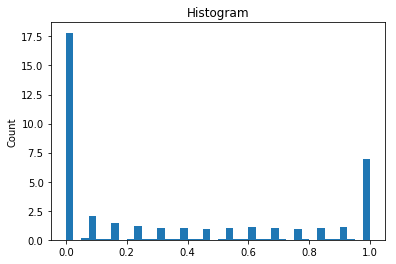

In [43]:
# Seasonal mean
# About 13 weeks per season
# Smaller bars are b/c some seasons have 14 weeks.

season_mean_snow = new_snow.resample(time='Q').mean('time')
print('Shape = ',np.shape(season_mean_snow))
print('')
print(season_mean_snow.time)
season_mean_snow.plot(bins=40,density=True)

### Average one year at a time (annual-mean data)


Shape =  (53, 88, 88)

<xarray.DataArray 'year' (year: 53)>
array([1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018])
Coordinates:
    snow_cover_threshold  float32 0.42
  * year                  (year) int64 1966 1967 1968 1969 1970 1971 1972 ...


(array([8.13590705, 1.28570648, 1.00895264, 1.62275056, 0.71294972,
        0.65338572, 1.23849174, 0.60399136, 0.60362852, 0.68861552,
        1.11064677, 0.62251424, 0.75217534, 1.25519791, 0.72021339,
        0.95737896, 1.58969944, 0.92868776, 1.12989604, 0.97444907,
        1.45459307, 0.91234184, 0.76670311, 1.40773765, 0.85205377,
        0.76960867, 1.4160911 , 0.90616971, 0.63050376, 0.56367751,
        0.85132738, 0.29963456, 0.24442975, 0.39624401, 0.13401869,
        0.11077425, 0.22481672, 0.09443051, 0.12566492, 1.24394039]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
        0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
        0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
        0.9  , 0.925, 0.95 , 0.975, 1.   ], dtype=float32),
 <a list of 40 Patch objects>)

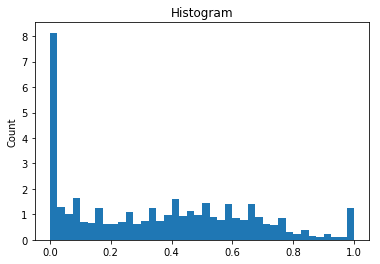

In [44]:
annual_mean_snow = new_snow.groupby('time.year').mean(dim='time')
print('Shape = ',np.shape(annual_mean_snow))
print('')
print(annual_mean_snow.year)
annual_mean_snow.plot(bins=40,density=True)

### Time-mean

Time-mean snow cover, still calculated for each grid cell separately.  This differs from the first time-mean average in that the points that never have snow are excluded.

(The grid point are, again, not expected to have the same distributions themselves, since amount of snow varies with location.)

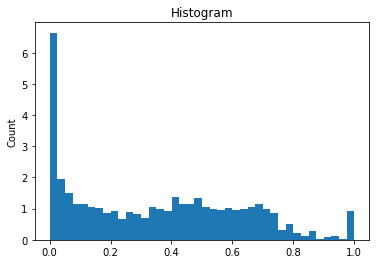

In [45]:
time_average_snow_new=new_snow.mean(dim='time')
time_average_snow_new.plot.hist(bins=40,density=True)
plt.show()

### Global-mean

Rather than looking at the distribution of the time mean for each grid point, another way we can examine the data is through the distribution of the "global"-mean time series.

This is just a rough calculation, since it doesn't take into account the areas of the cells.

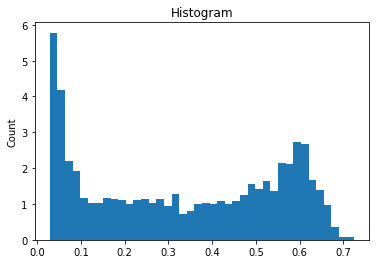

In [46]:
global_average_snow_new=new_snow.mean(dim='cols').mean(dim='rows')
global_average_snow_new.plot.hist(bins=40,density=True)
plt.show()